### Configure API Key

In [ ]:
import os
from google.colab import userdata

os.environ["ROBOFLOW_API_KEY"] = userdata.get("ROBOFLOW_API_KEY")

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


### Install Libraries

In [ ]:
!pip install -q git+https://github.com/sunsmarterjie/yolov12.git roboflow supervision

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.4/212.4 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 108.4 MB/s eta 0:00:00


### Download Dataset from Roboflow

In [ ]:
from roboflow import download_dataset

dataset = download_dataset('https://universe.roboflow.com/aegis/pothole-detection-i00zy/dataset/2', 'yolov12')

loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!ls {dataset.location}

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


### Fine-tuning YOLOv12s model

The YOLOv12 model variants (n,s, m, l, x) refer to different scales of the model, impacting their size, speed, and accuracy

- yolov12n (nano): Smallest, fastest, and lowest accuracy. Suitable for edge devices.
- yolov12s (small): A balance between speed and accuracy, commonly used.
- yolov12m (medium): Larger and more accurate than 's', but slower.
- yolov12l (large): Even larger and more accurate, but slower than 'm'
- yolov12x (extra-large): Largest, highest accuracy, and slowest.

In [ ]:
from ultralytics import YOLO

model = YOLO('yolov12s.yaml')

results = model.train(data=f'{dataset.location}/data.yaml', epochs=60)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/yolov12/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
FlashAttention is not available on this device. Using scaled_dot_product_attention instead.
New https://pypi.org/project/ultralytics/8.3.233 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov12s.yaml, data=/content/Pothole-Detection--2/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=Fal

100%|██████████| 755k/755k [00:00<00:00, 23.6MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1      9344  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2, 1, 2]          
  2                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  3                  -1  1     37120  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2, 1, 4]        
  4                  -1  1    103360  ultralytics.nn.modules.block.C3k2            [128, 256, 1, False, 0.25]    
  5                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  6                  -1  2    677120  ultralytics.nn.modules.block.A2C2f           [256, 256, 2, True, 4]        
  7                  -1  1   1180672  ultralytics

100%|██████████| 5.26M/5.26M [00:00<00:00, 122MB/s]


AMP: checks passed ✅


train: Scanning /content/Pothole-Detection--2/train/labels... 1037 images, 94 backgrounds, 0 corrupt: 100%|██████████| 1037/1037 [00:00<00:00, 2363.48it/s]

train: New cache created: /content/Pothole-Detection--2/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression
val: Scanning /content/Pothole-Detection--2/valid/labels... 296 images, 27 backgrounds, 0 corrupt: 100%|██████████| 296/296 [00:00<00:00, 1222.86it/s]

val: New cache created: /content/Pothole-Detection--2/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/60      6.77G       3.79      4.128      4.082         56        640: 100%|██████████| 65/65 [01:01<00:00,  1.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:15<00:00,  1.51s/it]

                   all        296        988    0.00143       0.11    0.00101   0.000319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/60      6.83G      3.211      3.388      3.297         73        640: 100%|██████████| 65/65 [00:38<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.04it/s]


                   all        296        988    0.00633      0.544     0.0179    0.00513

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/60      6.82G       2.85      2.856      2.774         70        640: 100%|██████████| 65/65 [00:34<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.94it/s]

                   all        296        988      0.148      0.107     0.0434     0.0124



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/60      6.83G      2.599      2.506      2.481        102        640: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.01it/s]


                   all        296        988       0.37      0.328       0.27     0.0926

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/60      6.71G      2.404      2.206      2.264         74        640: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.02it/s]


                   all        296        988      0.419      0.345      0.337      0.127

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/60      6.71G      2.265       2.09      2.158         75        640: 100%|██████████| 65/65 [00:33<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.08it/s]


                   all        296        988      0.507      0.388      0.404      0.167

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/60      6.88G      2.214      2.037      2.136        104        640: 100%|██████████| 65/65 [00:33<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.03it/s]


                   all        296        988       0.52      0.434      0.448      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/60      6.68G      2.114      1.914      2.033        114        640: 100%|██████████| 65/65 [00:33<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]


                   all        296        988      0.618       0.48       0.53      0.239

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/60      6.86G      2.048      1.833       1.96        116        640: 100%|██████████| 65/65 [00:33<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.08it/s]


                   all        296        988      0.599      0.506      0.561      0.243

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/60      6.83G      2.001      1.761      1.903         76        640: 100%|██████████| 65/65 [00:33<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.09it/s]


                   all        296        988      0.631      0.508      0.566      0.265

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/60      6.84G      1.981      1.731       1.92         78        640: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.06it/s]


                   all        296        988      0.672      0.544      0.631      0.298

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/60      6.66G       1.93      1.709      1.862         95        640: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.11it/s]


                   all        296        988      0.641      0.599      0.641        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/60      6.69G      1.884      1.641      1.818         52        640: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.03it/s]


                   all        296        988      0.652      0.595      0.637      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/60      6.85G      1.878      1.616      1.829        103        640: 100%|██████████| 65/65 [00:33<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.06it/s]


                   all        296        988      0.668      0.519      0.587      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/60       6.7G      1.854      1.559      1.786         89        640: 100%|██████████| 65/65 [00:34<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]


                   all        296        988      0.727      0.618      0.702      0.349

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/60       6.7G      1.812      1.535      1.763         48        640: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.12it/s]

                   all        296        988      0.677       0.61      0.669      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/60      6.85G      1.796      1.528      1.748         57        640: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.13it/s]


                   all        296        988       0.73      0.636      0.702      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/60      6.86G      1.786      1.467      1.728        107        640: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.24it/s]

                   all        296        988       0.73      0.631      0.721      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/60      6.87G      1.729       1.44      1.694         75        640: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.18it/s]


                   all        296        988      0.696      0.673      0.734      0.373

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/60      6.86G      1.722       1.41      1.705         54        640: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.04it/s]


                   all        296        988      0.727      0.666      0.736      0.387

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/60      6.87G      1.746      1.449      1.711         89        640: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.24it/s]

                   all        296        988      0.707      0.665      0.734      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/60       6.7G      1.703      1.381      1.645        113        640: 100%|██████████| 65/65 [00:34<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.27it/s]

                   all        296        988      0.724      0.686      0.749       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/60      6.68G      1.699      1.384      1.673        102        640: 100%|██████████| 65/65 [00:34<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]

                   all        296        988      0.691      0.682      0.724      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/60      6.85G      1.661      1.359      1.639         97        640: 100%|██████████| 65/65 [00:34<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]

                   all        296        988      0.774       0.67      0.772      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/60      6.88G      1.665      1.332      1.639         69        640: 100%|██████████| 65/65 [00:33<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]

                   all        296        988      0.772      0.694      0.788      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/60      6.84G      1.662      1.314       1.61         79        640: 100%|██████████| 65/65 [00:34<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]

                   all        296        988      0.754      0.716      0.794      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/60      6.83G      1.621      1.304       1.61         58        640: 100%|██████████| 65/65 [00:34<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.30it/s]

                   all        296        988       0.79      0.737       0.81      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/60      6.86G      1.594      1.264      1.565         59        640: 100%|██████████| 65/65 [00:34<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.29it/s]

                   all        296        988      0.761      0.717       0.79      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/60      6.83G      1.612      1.264      1.577         72        640: 100%|██████████| 65/65 [00:33<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.26it/s]

                   all        296        988      0.818       0.72      0.825      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/60      6.69G      1.604      1.242       1.57         85        640: 100%|██████████| 65/65 [00:33<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.22it/s]

                   all        296        988      0.799      0.728      0.817       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/60      6.86G      1.561      1.224      1.539         84        640: 100%|██████████| 65/65 [00:34<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.09it/s]

                   all        296        988      0.764      0.746      0.803      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/60      6.81G      1.544      1.211      1.534         69        640: 100%|██████████| 65/65 [00:34<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.78it/s]

                   all        296        988      0.807      0.702      0.809       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/60      6.83G      1.552      1.199      1.528        101        640: 100%|██████████| 65/65 [00:34<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.81it/s]

                   all        296        988        0.8      0.737      0.835      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/60      6.84G       1.55      1.177      1.518        121        640: 100%|██████████| 65/65 [00:36<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]

                   all        296        988      0.807       0.74      0.826      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/60       6.7G      1.545      1.171      1.516         89        640: 100%|██████████| 65/65 [00:33<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.87it/s]

                   all        296        988      0.792      0.732      0.816      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/60      6.69G      1.533      1.179      1.527         84        640: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.27it/s]

                   all        296        988      0.839      0.741      0.847      0.482



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/60      6.84G      1.537      1.161      1.502         59        640: 100%|██████████| 65/65 [00:34<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.83it/s]

                   all        296        988      0.796      0.735       0.82      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/60      6.88G      1.509      1.146      1.495         78        640: 100%|██████████| 65/65 [00:34<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.80it/s]

                   all        296        988      0.772      0.709      0.796      0.441



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/60      6.87G      1.507      1.148      1.507         68        640: 100%|██████████| 65/65 [00:33<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.75it/s]

                   all        296        988      0.817       0.76      0.846      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/60      6.66G      1.488      1.099      1.479         72        640: 100%|██████████| 65/65 [00:33<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.75it/s]

                   all        296        988      0.801      0.773      0.841      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/60      6.86G      1.476      1.097       1.46         84        640: 100%|██████████| 65/65 [00:33<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.73it/s]

                   all        296        988      0.845      0.739      0.842      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/60       6.7G      1.487       1.12      1.486         85        640: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.66it/s]

                   all        296        988        0.8      0.777      0.842      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/60      6.68G      1.489      1.131      1.464         67        640: 100%|██████████| 65/65 [00:33<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.36it/s]

                   all        296        988      0.831       0.76      0.849      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/60      6.86G      1.472      1.077      1.452        125        640: 100%|██████████| 65/65 [00:33<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.89it/s]

                   all        296        988      0.838      0.774       0.86      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/60      6.86G      1.441      1.078      1.443         59        640: 100%|██████████| 65/65 [00:33<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.96it/s]

                   all        296        988      0.817      0.769       0.85      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/60      6.85G      1.452      1.063       1.45         90        640: 100%|██████████| 65/65 [00:33<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]

                   all        296        988       0.81      0.763      0.842      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/60      6.84G      1.432      1.056      1.421         93        640: 100%|██████████| 65/65 [00:33<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.20it/s]


                   all        296        988      0.862      0.736      0.848      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/60      6.69G      1.418       1.07      1.432         48        640: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.18it/s]

                   all        296        988      0.822      0.796      0.873       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/60      6.67G      1.436      1.042      1.435         77        640: 100%|██████████| 65/65 [00:34<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]

                   all        296        988      0.841      0.779      0.862      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/60      6.85G      1.416      1.034       1.42         67        640: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]


                   all        296        988      0.842      0.782      0.869      0.521
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


Argument(s) 'quality_lower' are not valid for transform ImageCompression



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      51/60      6.68G      1.386      1.032      1.437         61        640: 100%|██████████| 65/65 [00:34<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.79it/s]

                   all        296        988      0.824      0.788       0.86      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      52/60      6.64G       1.37     0.9981      1.413         43        640: 100%|██████████| 65/65 [00:33<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.90it/s]

                   all        296        988      0.829      0.778      0.863      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      53/60      6.84G      1.366     0.9784      1.416         43        640: 100%|██████████| 65/65 [00:33<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.07it/s]

                   all        296        988      0.831      0.798      0.871      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      54/60      6.84G      1.338     0.9458      1.403         49        640: 100%|██████████| 65/65 [00:33<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.03it/s]


                   all        296        988      0.839      0.803      0.875      0.524

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      55/60      6.65G       1.34     0.9414      1.401         31        640: 100%|██████████| 65/65 [00:33<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.03it/s]


                   all        296        988      0.829       0.81      0.879      0.526

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      56/60      6.83G      1.328     0.9481        1.4         32        640: 100%|██████████| 65/65 [00:33<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  2.97it/s]

                   all        296        988      0.861       0.77      0.872       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      57/60      6.83G      1.307     0.9133      1.375         36        640: 100%|██████████| 65/65 [00:33<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.06it/s]

                   all        296        988      0.839      0.793      0.868      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      58/60      6.82G      1.311     0.8964      1.371         48        640: 100%|██████████| 65/65 [00:33<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]


                   all        296        988      0.853      0.809      0.877      0.531

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      59/60      6.84G      1.293     0.8931      1.374         40        640: 100%|██████████| 65/65 [00:33<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]


                   all        296        988      0.854      0.795       0.88       0.54

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      60/60      6.83G      1.283     0.8847      1.361         32        640: 100%|██████████| 65/65 [00:33<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:03<00:00,  3.14it/s]


                   all        296        988       0.84      0.809      0.878      0.541

60 epochs completed in 0.655 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 18.6MB
Optimizer stripped from runs/detect/train/weights/best.pt, 18.6MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLOv12s summary (fused): 376 layers, 9,074,595 parameters, 0 gradients, 19.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:04<00:00,  2.15it/s]


                   all        296        988      0.841      0.809      0.878      0.541
Speed: 0.2ms preprocess, 6.6ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train


### Evaluate fine-tuned YOLOv12s model


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!ls {HOME}/runs/detect/train/

args.yaml					   train_batch1.jpg
confusion_matrix_normalized.png			   train_batch2.jpg
confusion_matrix.png				   train_batch3250.jpg
events.out.tfevents.1764399991.ae09480828fc.364.0  train_batch3251.jpg
F1_curve.png					   train_batch3252.jpg
labels_correlogram.jpg				   val_batch0_labels.jpg
labels.jpg					   val_batch0_pred.jpg
P_curve.png					   val_batch1_labels.jpg
PR_curve.png					   val_batch1_pred.jpg
R_curve.png					   val_batch2_labels.jpg
results.csv					   val_batch2_pred.jpg
results.png					   weights
train_batch0.jpg


In [ ]:
!zip -r YOLOv12.zip /content/

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/default_configs.db (deflated 98%)
  adding: content/.config/gce (stored 0%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/hidden_gcloud_config_universe_descriptor_data_cache_configs.db (deflated 97%)
  adding: content/.config/.last_update_check.json (deflated 23%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2025.11.20/ (stored 0%)
  adding: content/.config/logs/2025.11.20/14.30.45.231815.log (deflated 57%)
  adding: content/.config/logs/2025.11.20/14.30.35.382199.log (deflated 87%)
  adding: content/.config/logs/2025.11.20/14.30.45.937471.log (deflated 56%)
  adding: content/.config/logs/2025.11.20/14.30.04.285207.log (deflated 93%)
  adding: 

In [ ]:
from google.colab import files

files.download('/content/YOLOv12.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

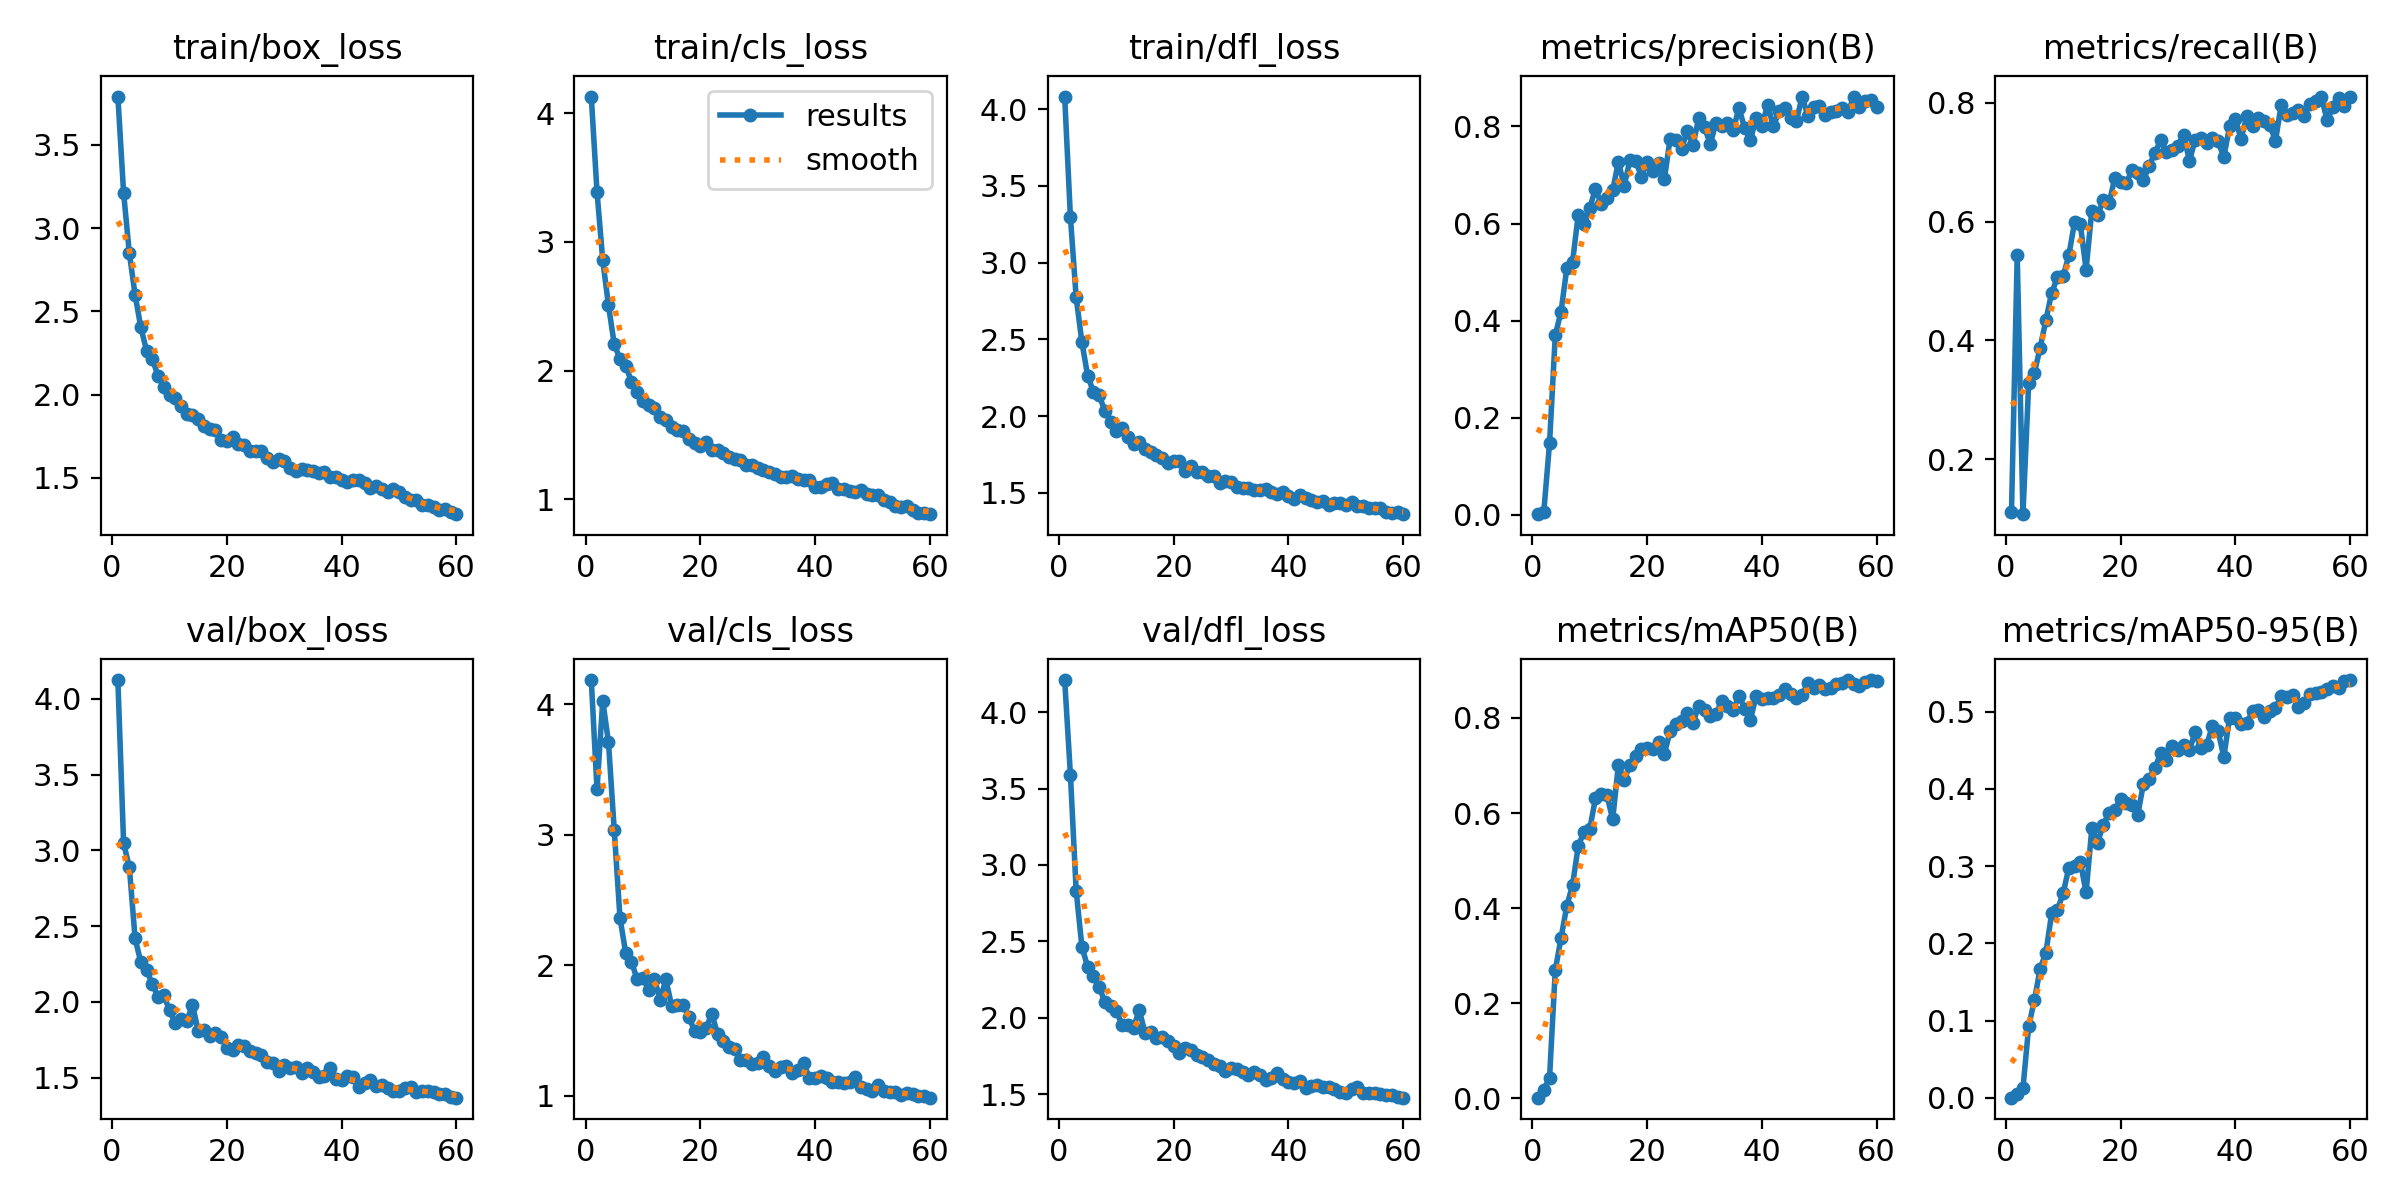

In [ ]:
from IPython.display import Image

Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

### Loading the best weights to evaluate test set

In [ ]:
import supervision as sv

ds = sv.DetectionDataset.from_yolo(
    images_directory_path=f"{dataset.location}/test/images",
    annotations_directory_path=f"{dataset.location}/test/labels",
    data_yaml_path=f"{dataset.location}/data.yaml"
)

model = YOLO(f'/{HOME}/runs/detect/train/weights/best.pt')

metrics = model.val(data=f"{HOME}/Pothole-Detection--2/data.yaml", split="test")

Ultralytics 8.3.63 🚀 Python-3.12.12 torch-2.9.0+cu126 CPU (Intel Xeon 2.20GHz)
YOLOv12s summary (fused): 376 layers, 9,074,595 parameters, 0 gradients, 19.3 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 4.89MB/s]
val: Scanning /content/Pothole-Detection--2/test/labels... 149 images, 23 backgrounds, 0 corrupt: 100%|██████████| 149/149 [00:00<00:00, 2305.08it/s]

val: New cache created: /content/Pothole-Detection--2/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [02:00<00:00, 12.06s/it]


                   all        149        511      0.878      0.783      0.897      0.559
Speed: 4.8ms preprocess, 795.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/val


### Computing Evaluation Metrics

In [ ]:
from supervision.metrics import MeanAveragePrecision

predictions = []
targets = []

for _, image, target in ds:
    results = model(image, verbose=False)[0]
    detections = sv.Detections.from_ultralytics(results)

    predictions.append(detections)
    targets.append(target)

map = MeanAveragePrecision().update(predictions, targets).compute()

precision = metrics.box.p
recall = metrics.box.r
f1 = metrics.box.f1

print(f"mAP 50:95: {map.map50_95*100:.2f}")
print(f"mAP 50: {map.map50*100:.2f}")
print(f"mAP 75: {map.map75*100:.2f}")

print(f"\nPrecision: {precision[0]*100:.2f}")
print(f"Recall: {recall[0]*100:.2f}")
print(f"F1-score: {f1[0]*100:.2f}")

mAP 50:95: 52.38
mAP 50: 84.18
mAP 75: 59.37

Precision: 87.75
Recall: 78.28
F1-score: 82.74


### Run inference with fine-tuned YOLOv12s model